In [1]:
import pandas as pd
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dados/CC GENERAL.csv')

In [3]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [4]:
df.drop(columns=['CUST_ID', 'TENURE'], inplace = True)

In [5]:
df.head(1)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  40.900749           0.818182       95.4               0.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4           0.0             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.0                          0.083333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1000.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0  201.802084        139.509787               0.0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [7]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [8]:
df.fillna(df.median(), inplace = True)

In [9]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [10]:
values = Normalizer().fit_transform(df.values)

In [11]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter = 300)

In [12]:
y_pred =  kmeans.fit_predict(values)

In [13]:
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric = 'euclidean')
silhouette

0.36451198422831005

In [14]:
dbs = metrics.davies_bouldin_score(values, labels)
dbs

1.0754963863506781

In [15]:
calinski = metrics.calinski_harabasz_score(values, labels)
calinski

3431.794767050229

In [16]:
def clustering_algorinthm(n_clusters, dataset):
    kmeans = KMeans(n_clusters = n_clusters, n_init = 10, max_iter = 300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric = 'euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [17]:
s1, dbs1, calinski1 = clustering_algorinthm(3, values)
print(s1, dbs1, calinski1)

0.32713788858073434 1.310173917319483 3526.4524659371787


In [18]:
s2, dbs2, calinski2 = clustering_algorinthm(5, values)
print(s2, dbs2, calinski2)

0.34852928204523576 1.1527134855876944 3422.838208337746


In [19]:
s3, dbs3, calinski3 = clustering_algorinthm(10, values)
print(s3, dbs3, calinski3)

0.305247345304592 1.196418587965707 3011.1164512578634


In [20]:
random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorinthm(5, random_data)
print(s, dbs, calinski)
print('==========================================================')
print(s2, dbs2, calinski2)

0.03955810160455671 3.5136490199113615 301.8654101896458
0.34852928204523576 1.1527134855876944 3422.838208337746


In [21]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorinthm(5, set1)
s2, dbs2, calinski2 = clustering_algorinthm(5, set2)
s3, dbs3, calinski3 = clustering_algorinthm(5, set3)

print(s1, dbs1, calinski1)
print('               --------------------------')
print(s2, dbs2, calinski2)
print('               --------------------------')
print(s3, dbs3, calinski3)

0.3685724000878285 1.0566572283925255 1204.1084172648182
               --------------------------
0.35406999696241026 1.1389554530299943 1194.9454119497243
               --------------------------
0.3671249079561881 1.0988784707210417 1167.5336633283064


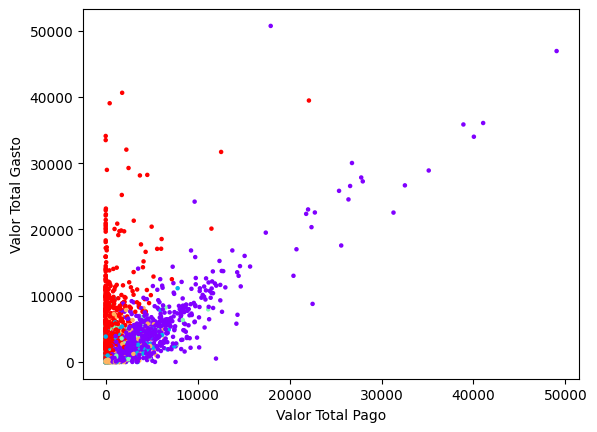

In [22]:
plt.scatter(df['PURCHASES'], df['PAYMENTS'], c = labels, s = 5, cmap = 'rainbow')
plt.xlabel('Valor Total Pago')
plt.ylabel('Valor Total Gasto')
plt.show()

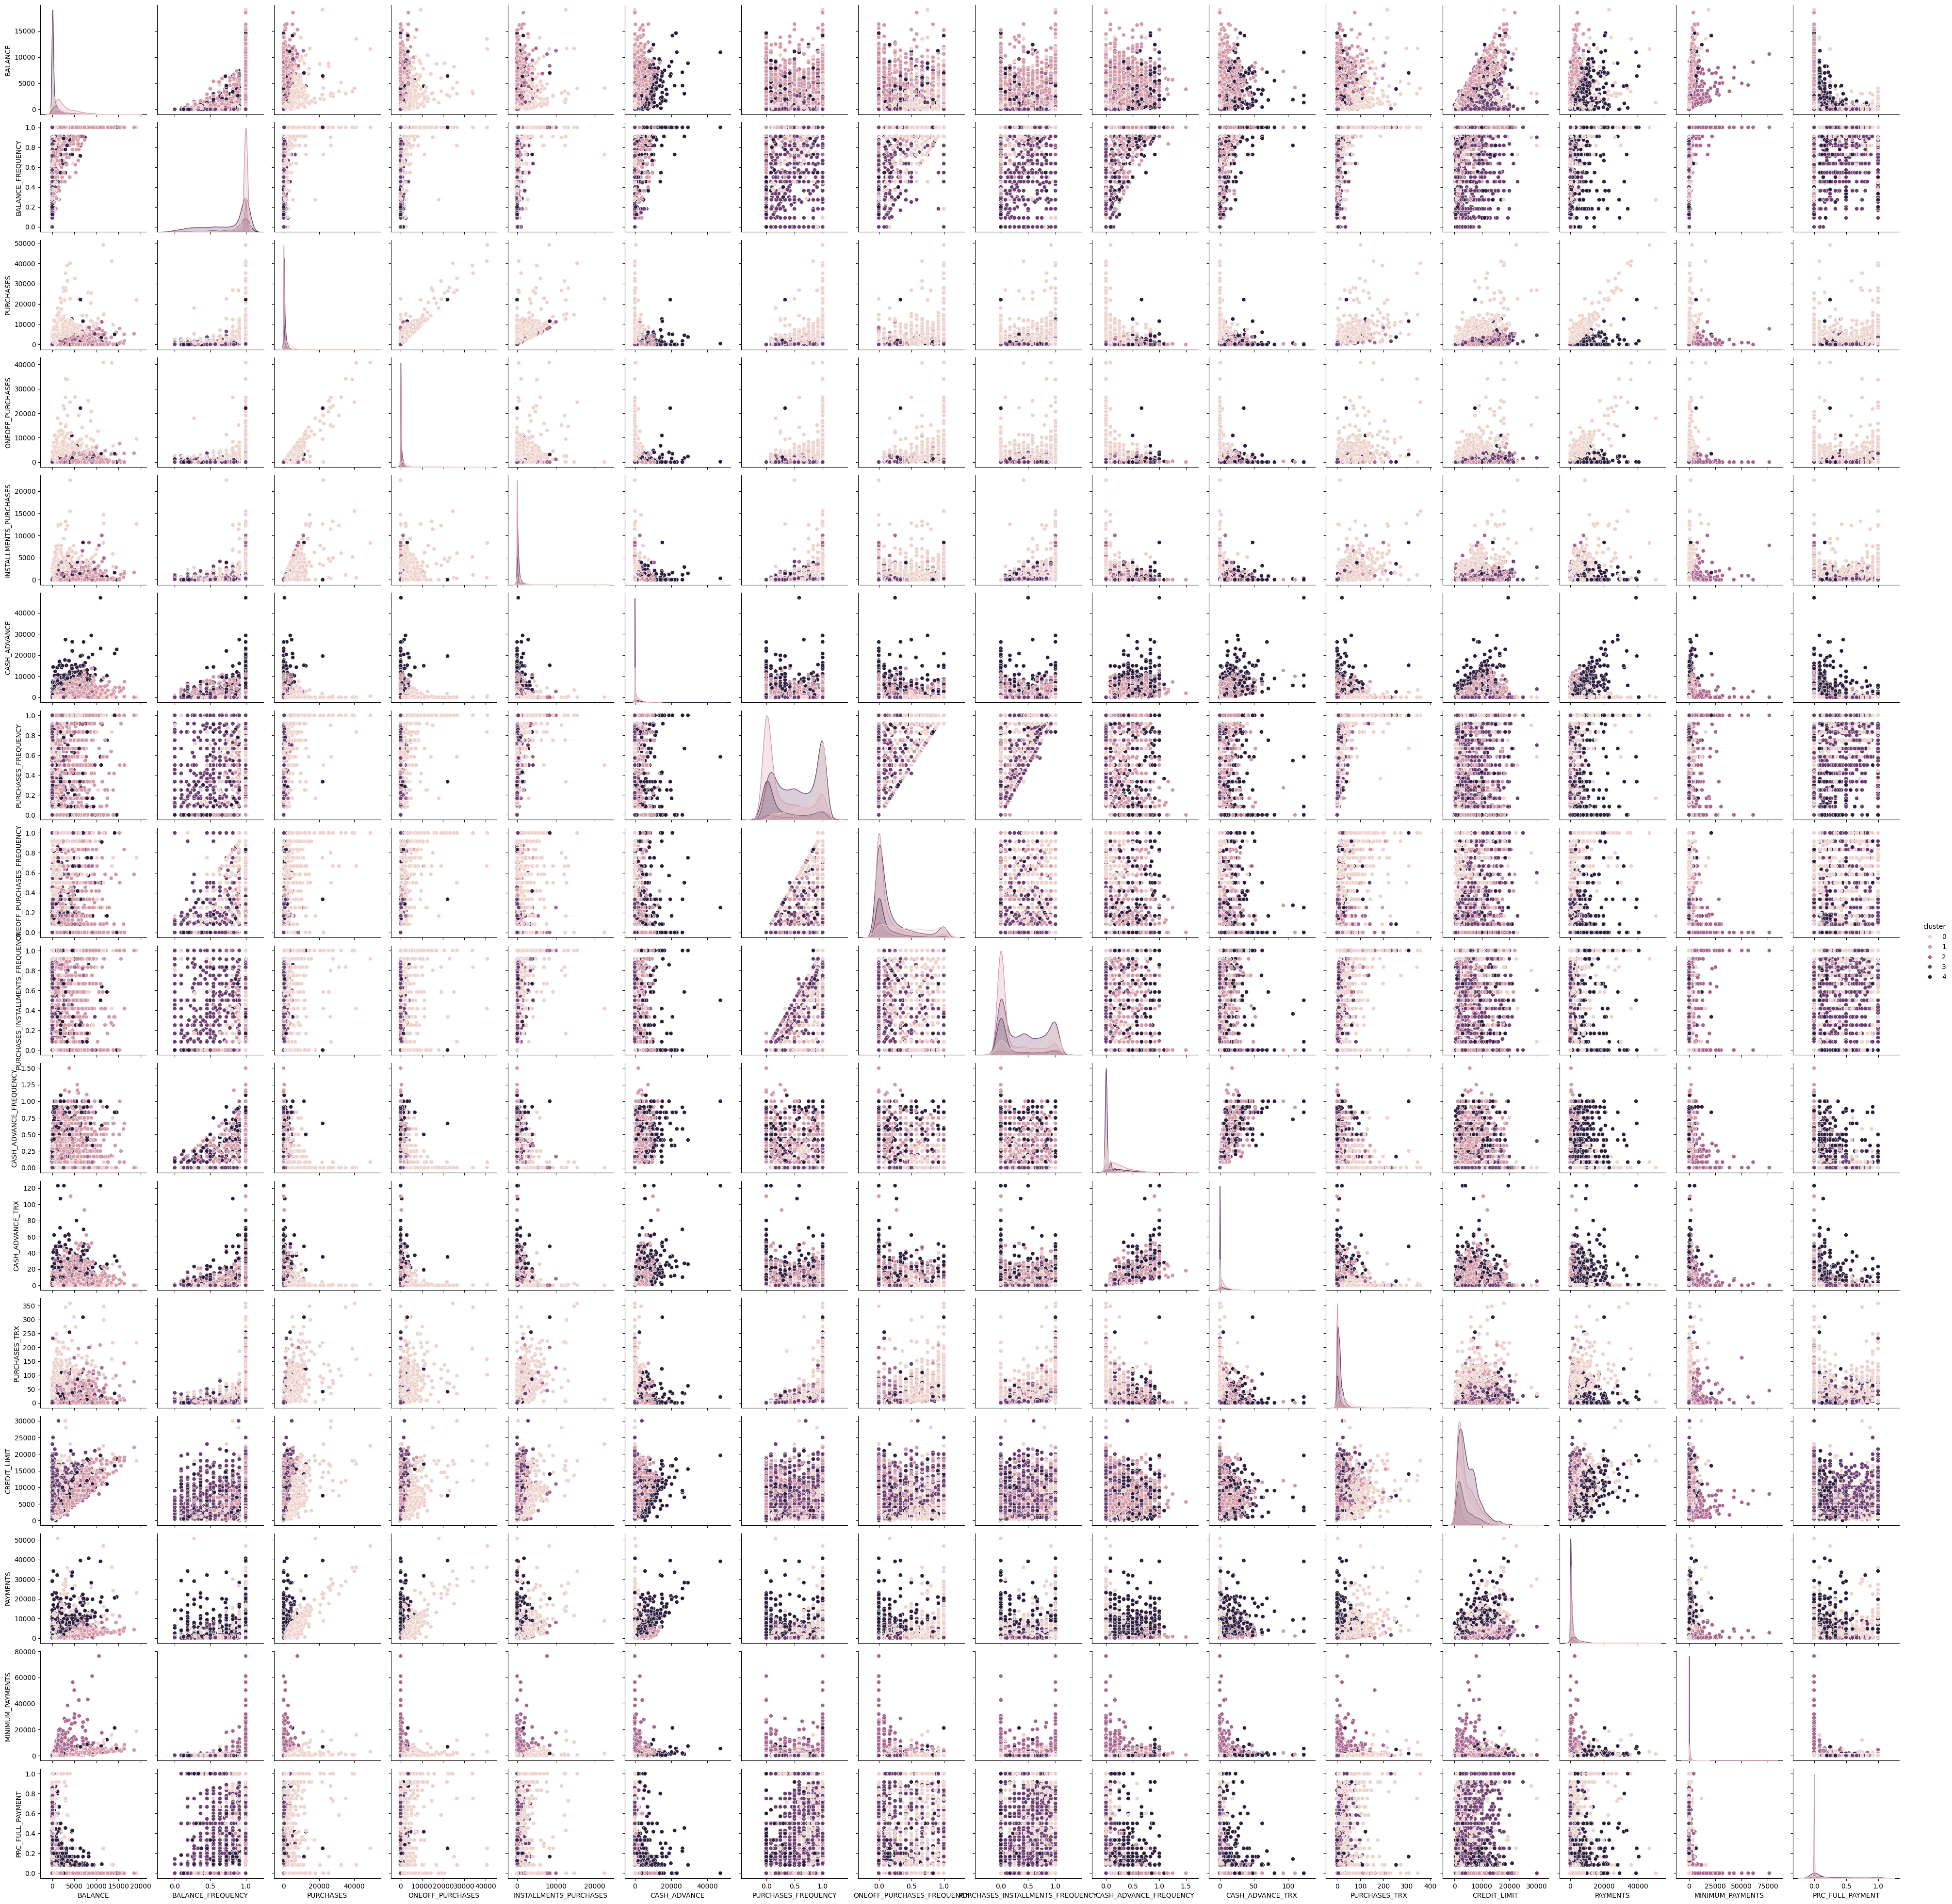

In [23]:
df['cluster'] = labels
sns.pairplot(df[0:], hue = 'cluster')

In [24]:
df.groupby('cluster').describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        1538.0  1143.712630  1664.669654   0.000000   212.513230   
1        2648.0  3038.132314  2479.290949   6.824905  1256.126442   
2         412.0  1987.146873  1852.215743  70.794108  1020.146724   
3        3281.0   443.767052   846.269966   0.000000    23.390230   
4        1071.0  1795.836702  1983.632225   0.000000   506.773698   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0         555.745265  1371.943854  19043.138560            1538.0  0.928255   
1        2173.994774  4224.605542  18495.558550            2648.0  0.963768   
2        1338.918346  2133.415063  11670.179850             412.0  0.989512   
3          82.980060   411.727643   9630.367575            3281.0  0.774457   
4        1088.056301  2317.702916  14581.459140            1071.0  0.861984   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       524.765832  18621.013310           1538.0  0.278149   
1        ...      1330.437428   8345.641905           2648.0  0.001800   
2        ...      7086.774783  76406.207520            412.0  0.019271   
3        ...       248.700571   4483.503862           3281.0  0.246761   
4        ...       887.346861  21235.065300           1071.0  0.117296   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.366934  0.0  0.0  0.083333  0.545455  1.0  
1        0.023264  0.0  0.0  0.000000  0.000000  0.6  
2        0.090795  0.0  0.0  0.000000  0.000000  1.0  
3        0.346705  0.0  0.0  0.000000  0.444444  1.0  
4        0.186974  0.0  0.0  0.083333  0.142857  1.0  

[5 rows x 128 columns]

In [25]:
centroids = kmeans.cluster_centers_
centroids

array([[1.59893172e-01, 2.45101382e-04, 4.38385714e-01, 2.57205740e-01,
        1.81351596e-01, 2.60404572e-02, 2.04213900e-04, 8.90367629e-05,
        1.50434389e-04, 9.40165310e-06, 1.70436759e-04, 6.17221746e-03,
        6.03815441e-01, 4.02876087e-01, 8.52134751e-02, 7.19112993e-05],
       [5.04294070e-01, 2.72242076e-04, 6.17554553e-02, 3.62405829e-02,
        2.55365937e-02, 2.52765717e-01, 6.72943541e-05, 2.57072238e-05,
        4.50409323e-05, 5.74261583e-05, 1.15669149e-03, 1.33139220e-03,
        7.19260678e-01, 1.66160406e-01, 1.79203910e-01, 5.52512128e-07],
       [3.32972556e-01, 2.68240066e-04, 1.58923673e-01, 3.62178588e-02,
        1.23089552e-01, 5.82140753e-02, 1.66817881e-04, 2.64295391e-05,
        1.47135264e-04, 1.92748591e-05, 4.26896159e-04, 3.86195702e-03,
        3.76646957e-01, 2.52402941e-01, 6.79571553e-01, 4.22964707e-06],
       [6.91187945e-02, 2.30816694e-04, 1.21521078e-01, 4.80031635e-02,
        7.36181130e-02, 2.43929836e-02, 1.72835316e-04, 3.368

In [26]:
max = len(centroids[0])
for i in range(max):
    print(df.columns.values[i], '{:.4f}'.format(centroids[:, i].var()))

BALANCE 0.0224
BALANCE_FREQUENCY 0.0000
PURCHASES 0.0197
ONEOFF_PURCHASES 0.0077
INSTALLMENTS_PURCHASES 0.0036
CASH_ADVANCE 0.0226
PURCHASES_FREQUENCY 0.0000
ONEOFF_PURCHASES_FREQUENCY 0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 0.0000
CASH_ADVANCE_FREQUENCY 0.0000
CASH_ADVANCE_TRX 0.0000
PURCHASES_TRX 0.0000
CREDIT_LIMIT 0.0360
PAYMENTS 0.0279
MINIMUM_PAYMENTS 0.0542
PRC_FULL_PAYMENT 0.0000


In [27]:
description = df.groupby('cluster')[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
description

BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0        1143.712630  3274.692952    186.045097   4103.875261  3046.004076   
1        3038.132314   385.096760   1636.114441   4496.336858   968.599396   
2        1987.146873   858.326286    420.107194   2226.699029  1338.974045   
3         443.767052   629.212624    141.652025   5129.746043   814.456295   
4        1795.836702   470.954463   3272.160223   3975.416631  4704.149015   

         n_clients  
cluster             
0             1538  
1             2648  
2              412  
3             3281  
4             1071

CLUSTER 0: Clientes com menor limite. Não são bons pagadores. Menor quantidade de clientes.


CLUSTER 1: Clientes que gastam pouco. Clientes com o maior limite. Bons pagadores.


CLUSTER 2: Clientes que mais gastam. O foco deles é o saque. Piores pagadores. Boa quantidade de clientes.


CLUSTER 3: Clientes que gastam muito com compras. Melhores pagadores.


CLUSTER 4: Clientes que gastam muito com saques. Pagam as vezes.